## Introduction to Linear Regression
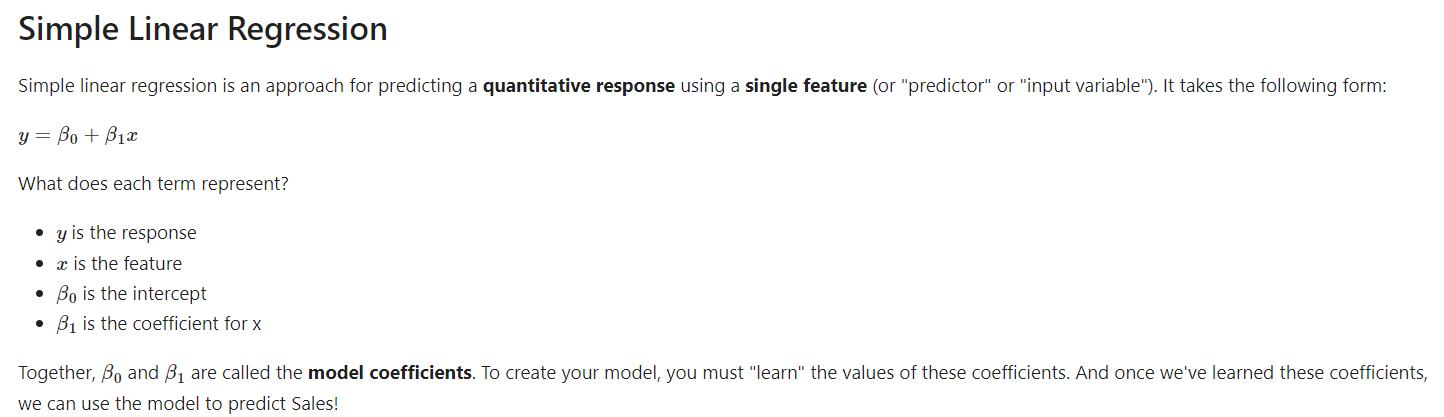

## Estimating Model Coefficients

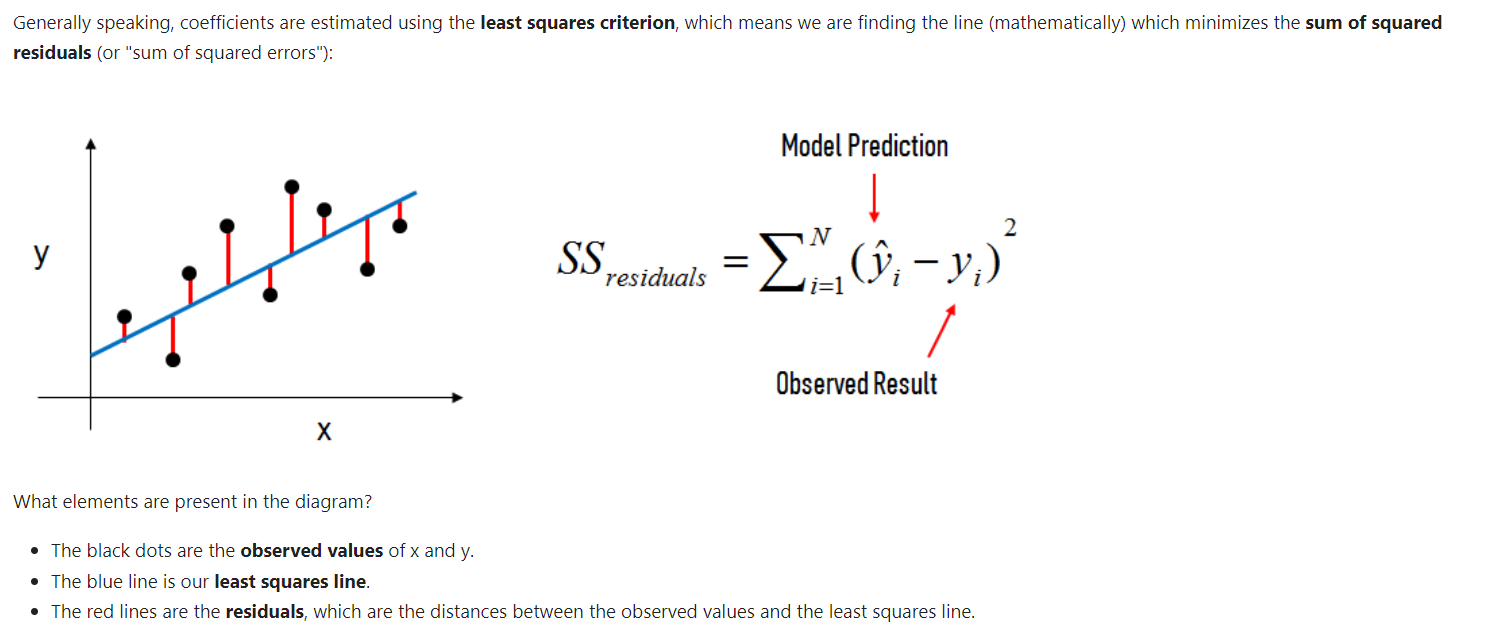

---

### Relation between Model and Coefficients

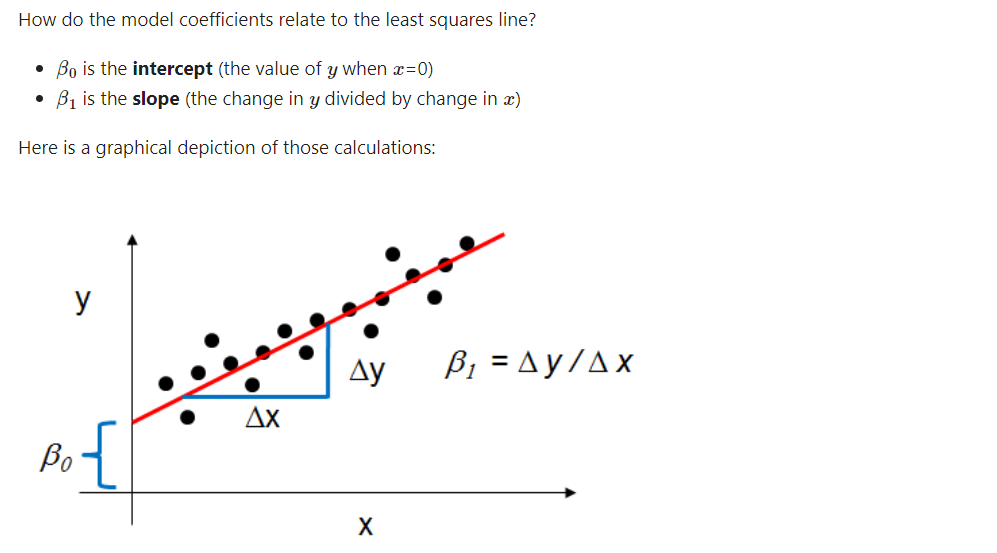

In [1]:
#!pip install sklearn

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [4]:
df=pd.read_csv('Ecommerce Customers.csv')

## About Dataset

Avg. Session Length: Average session of in-store style advice sessions.

Time on App: Average time spent on App in minutes

Time on Website: Average time spent on Website in minutes

Length of Membership: How many years the customer has been a member.

In [5]:
df.head(5)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [7]:
#df = df.drop(df.columns[:3],axis=1)

In [8]:
df.drop(['Email','Address','Avatar'],inplace=True,axis=1)

In [9]:
df.shape

(500, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


## Check for missing values
Missing values in the data results in poor model performance.

In [12]:
df.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

---

Our model has no missing values. But if we had missing values, we can deal with them in these main ways

- Getting rid of customers with a lot of missing values in their columns.

- Getting rid of the whole attribute or remove the whole column.

- Setting the missing values to some value (zero, the mean, the median, etc.).

## Multiple Linear Regression Assumptions

## Assumption 1 : There must be a linear relationship between our independent variables and the dependent variable

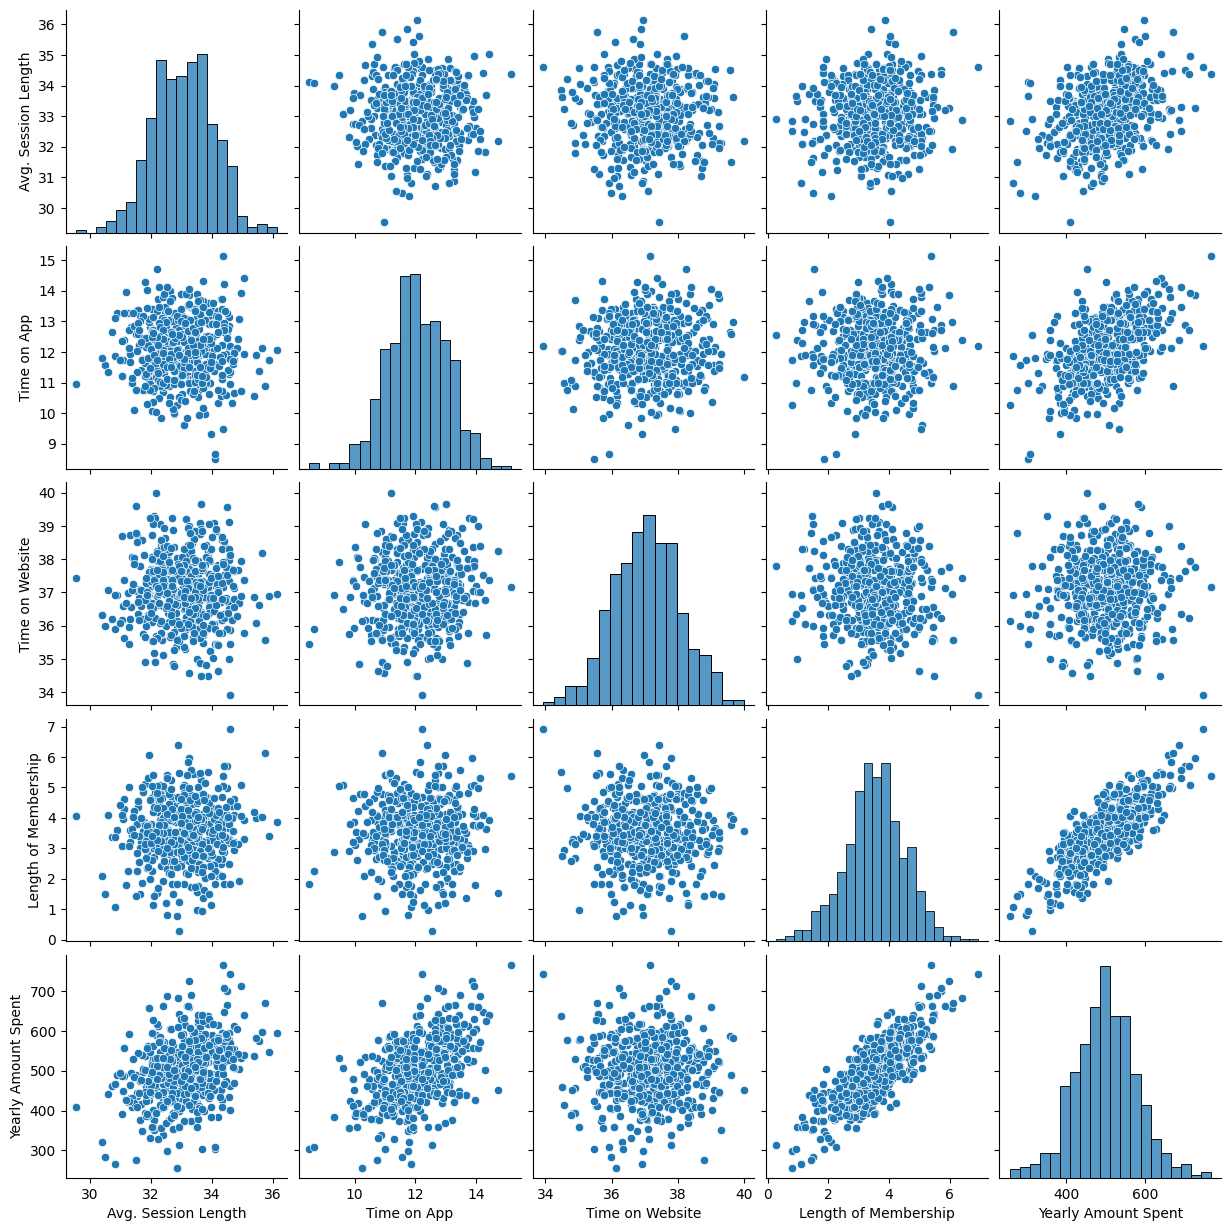

In [13]:
# create a scatter plot
sns.pairplot(df)

## Assumption 2 - Linear regression assumes that our data follows a normal distribution

Regressors assume the data follows a normal distribution (data points are spread symmetrically around the true mean value). If the data is not normal, perform data transformation to reduce its skewness.

Negatively skewed data requires a power transformation or an exponential transformation. In contrast, positively skewed data requires a log transformation or square root transformation.

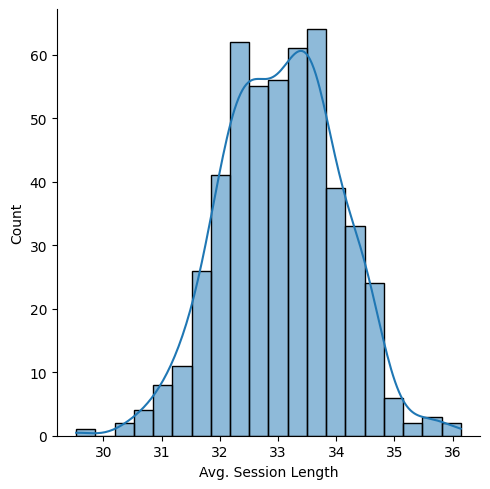

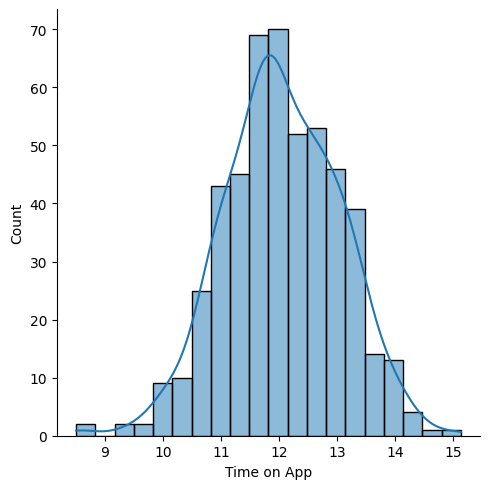

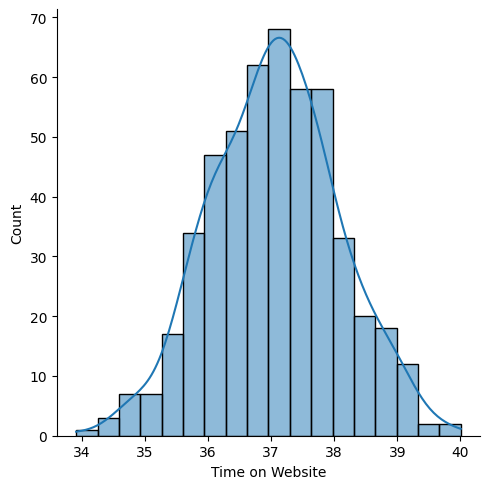

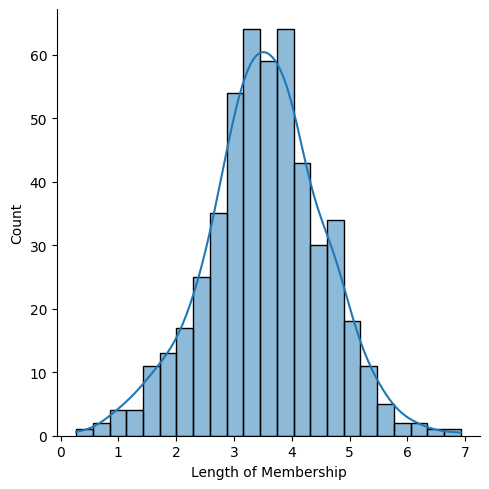

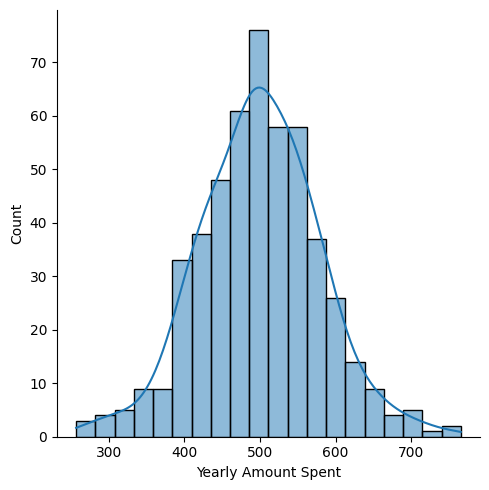

In [14]:
for i in range(len(df.columns)):   
    sns.displot(df.iloc[:,i],kde=True)


## Assumption 3 - There must be no autocorrelation in the residuals. 

Autocorrelation in the residuals of a linear regression model refers to the situation where the residuals (i.e., the differences between the observed values and predicted values) exhibit a pattern of correlation over time or across observations.

In other words, there is a relationship between the errors (residuals) at one time point and the errors at another time point, or between the errors of observations that are close to each other in time or space.

This is a violation of the assumption of independence of errors in linear regression. When there is autocorrelation in the residuals, it means that the model is not able to fully explain the variability in the dependent variable, and there may be other factors affecting the dependent variable that are not included in the model.

Autocorrelation in the residuals can lead to biased estimates of the regression coefficients, incorrect standard errors, and reduced predictive power of the model. To check for autocorrelation, we can use statistical tests such as the Durbin-Watson test or the Breusch-Godfrey test. If autocorrelation is detected, we may need to modify the model or use a different modeling technique that takes into account the autocorrelation in the data.

## Assumption 4 - There must be little or no multicollinearity in the data.

Correlation measures the relationship between two variables. When these two variables are so highly correlated that they explain each other (to the point that you can predict the one variable with the other), then we have Collinearity

In [15]:
## Correlation 
corr = df.corr(method="pearson")

In [16]:
corr

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<AxesSubplot:>

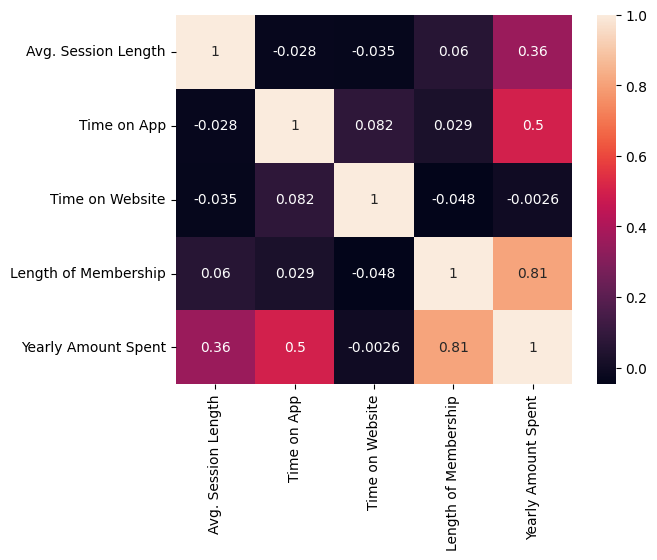

In [17]:
sns.heatmap(corr,annot=True)

https://medium.com/mlearning-ai/handling-missing-values-data-science-7b8e302264ee

## Split Data into Training and Test Data

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Split the data into training and test sets using a standard 70/30  or 80/20 split.

 X_train - This includes your all independent variables,these will be used to train the model, also as we have specified the test_size = 0.2, this means 80% of observations from your complete data will be used to train/fit the model and rest 20% will be used to test the model.

X_test - This is remaining 20% portion of the independent variables from the data which will not be used in the training phase and will be used to make predictions to test the accuracy of the model.

 y_train - This is your dependent variable which needs to be predicted by this model, this includes category labels against your independent variables, we need to specify our dependent variable while training/fitting the model.

 y_test - This data has category labels for your test data, these labels will be used to test the accuracy between actual and predicted categories.

In [18]:
#!pip install sklearn

## Defining our Independent Features X and Dependent Features y

In [19]:
df.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [20]:

#X=df.drop('Yearly Amount Spent',axis=1)
X = df[['Avg. Session Length', 'Time on App','Length of Membership','Time on Website']]
y = df[['Yearly Amount Spent']]


In [21]:
X.head(30)

,Avg. Session Length,Time on App,Length of Membership,Time on Website
0,34.497268,12.655651,4.082621,39.577668
1,31.926272,11.109461,2.664034,37.268959
2,33.000915,11.330278,4.104543,37.110597
3,34.305557,13.717514,3.120179,36.721283
4,33.330673,12.795189,4.446308,37.536653
5,33.871038,12.026925,5.493507,34.476878
6,32.021595,11.366348,4.685017,36.683776
7,32.739143,12.351959,4.434273,37.373359
8,33.987773,13.386235,3.273434,37.534497
9,31.936549,11.814128,3.202806,37.145168


In [22]:
# import the package for splitting dataset
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
X_train.shape


(400, 4)

In [25]:
y_train.shape


(400, 1)

In [26]:
X_test.shape


(100, 4)

In [27]:
y_test.shape


(100, 1)

## Feature Scaling

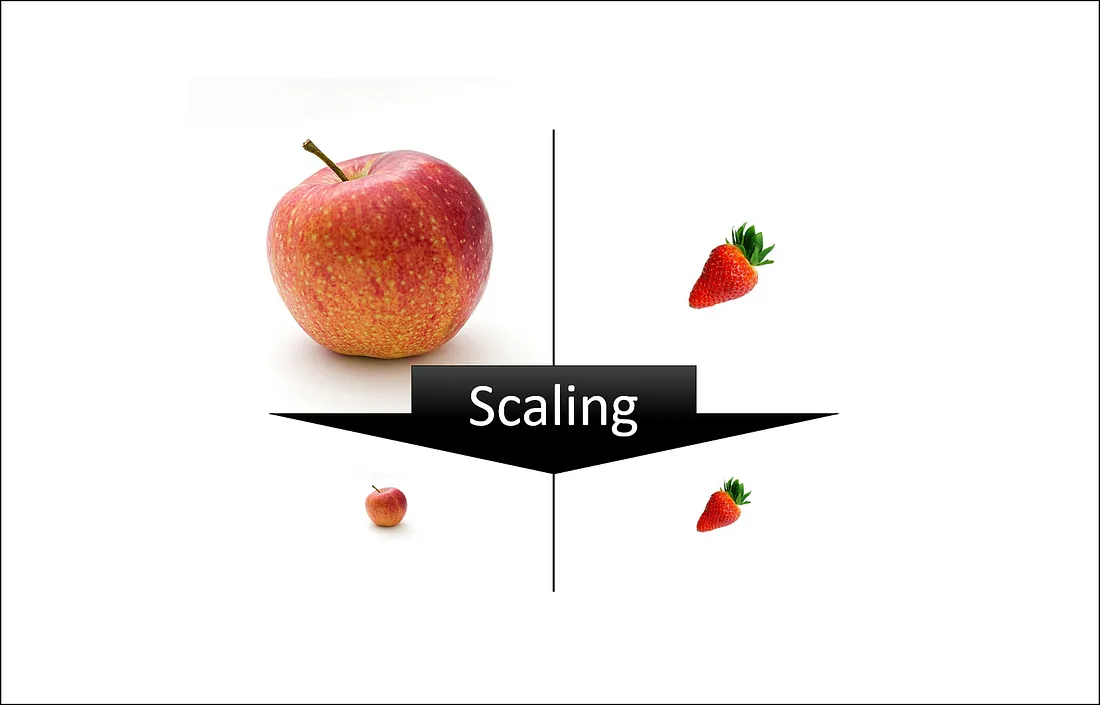

Feature scaling is done to standardize features that greatly vary in magnitude and units.This include : kNN algorithm, kMeans Clustering(Euclidean Distance), Linear Regression, Logistic Regression, and SVM.

Feature scaling is a preprocessing technique used in machine learning to standardize or normalize the numerical features of a dataset. It involves transforming the values of different features into a consistent scale, which can help improve the performance of certain machine learning algorithms.

The need for feature scaling arises because many machine learning algorithms are sensitive to the scale of the input features. If the features have different scales or units, it can cause certain algorithms to give undue importance to features with larger values, leading to biased or suboptimal results.

The purpose of standardization is to transform the data so that it has a mean of zero and a standard deviation of one.

Since the mean and standard deviation are calculated based on the data, the resulting scaled values can take any real value. The scaling process adjusts the values proportionally, preserving the shape of the distribution and maintaining the relationships between the data points.

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc=StandardScaler()

In [30]:
X_train=sc.fit_transform(X_train)

In [31]:
## Confirm scaling has occured
X_train

array([[ 0.72875642, -0.14037638,  0.06519748, -0.17321598],
       [ 1.23367035, -0.23549152, -1.41309514, -0.70076461],
       [-0.44946539,  1.93596148,  0.48362047,  0.16698241],
       ...,
       [-1.26587083, -1.17327098, -0.42804013, -2.08875054],
       [-0.81225043,  2.07956541,  0.18897947,  0.00264921],
       [-0.64425634, -0.61010223, -0.95567649,  0.55038981]])

In [32]:
# scale the test variables as well by transforming
X_test=sc.transform(X_test) 

In [33]:
#X_test

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
# giving a variable name to our algorithm
lr=LinearRegression()

In [36]:
lr.fit(X_train,y_train)

LinearRegression()

## Find Y intercepts

In [37]:
lr.intercept_

array([501.99215121])

This means the minimum amount expected for any customer yearly spend is 501 dollars.

## Find Coefficient

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


In [39]:
coeff=lr.coef_.T

In [40]:
pd.DataFrame(coeff,X.columns,columns=['Coefficient'])

,Coefficient
Avg. Session Length,25.250381
Time on App,38.703501
Length of Membership,63.543211
Time on Website,0.315469


# Conclusion for our coefficients and business problem?
The Time spent on Website seems to have little influence on the Yearly Amount Spent(0.312 dollars)

The Time on App has greater influence in terms of customer spending.

What would you advise the company? Maybe customer experience on the website is not good and they could do a research and ask customers why don’t like purchasing products on the website.

Length of Membership has the most influence on customer yearly spend.

## Making Predictions

In [41]:
y_test

,Yearly Amount Spent
361,401.033135
73,534.777188
374,418.602742
155,503.978379
104,410.069611
...,...
347,593.156402
86,487.379306
75,478.719357
438,392.992256


In [42]:
# predict the remaining 20%
predictions=lr.predict(X_test)

---

 ## Model evaluation metrics for regression

In [43]:
from sklearn import metrics

### 1. Mean Absolute Error
Mean Absolute Error (MAE) is the mean of the absolute value of the errors.

It is the average of the absolute differences between the predicted values and the actual values. It measures the average absolute deviation between the predicted and actual values, and is less sensitive to outliers than MSE.

## Example

Actual prices: [5000, 6000, 7000, 8000, 9000]
Predicted prices: [5500, 6500, 7500, 8500, 9500]

Absolute differences: [500, 500, 500, 500, 500]

MAE = (500 + 500 + 500 + 500 + 500) / 5 = 500

Therefore, the MAE for this model is 500.

This means that, on average, the model's predictions are off by $500. In other words, the model's predicted prices are, on average, $500 away from the actual prices. A lower MAE indicates that the model's predictions are closer to the actual values, and a higher MAE indicates that the model's predictions are farther from the actual values.

In [44]:
# the reserved y test and the predictions
metrics.mean_absolute_error(y_test,predictions)

8.558441887438086

## Interpretation
The mean absolute error is 8.5, which means that the model miscalculated the actual yearly amount spent  by approximately $8.5 on average.

### 2. Mean Squared Error

MSE is the average of the squared differences between the predicted values and the actual values. It measures the average squared deviation between the predicted and actual values, and is a commonly used metric for assessing the accuracy of a regression model.
The mean squared error (MSE) tells you how close a regression line is to a set of points.The lower the MSE, the better the forecast.

The smaller the mean squared error, the closer you are to finding the line of best fit.

MSE is useful because it penalizes larger errors more heavily due to the squaring operation. However, it has the drawback of being sensitive to outliers as squared errors amplify their impact.

# Example

Actual weights: [150, 175, 200, 225, 250]
Predicted weights: [155, 180, 195, 220, 245]
    
Squared differences: [25, 25, 25, 25, 25]
    
MSE = (25 + 25 + 25 + 25 + 25) / 5 = 25

Therefore, the MSE for this model is 25.

This means that, on average, the model's predictions are off by 25 squared units (e.g. pounds squared). In other words, the model's predicted weights are, on average, 5 pounds away from the actual weights. A lower MSE indicates that the model's predictions are closer to the actual values, and a higher MSE indicates that the model's predictions are farther from the actual values. Note that the MSE is always positive, and the units of the MSE are the units of the dependent variable squared.

In [45]:
metrics.mean_squared_error(y_test, predictions)

109.86374115216114

### 3. Median Absolute Error(MAE)
MSE and MAE, are usually highly affected by outliers.Outliers are one of the causes of pushing mean loss value up. We therefore calculate the median absolute loss which usually drops the mean absolute error

In [46]:
metrics.median_absolute_error(y_test,predictions)

7.324396735437034

### 4. RMSE
RMSE is the square root of the MSE. It measures the standard deviation of the errors and is a popular metric for evaluating regression models. It is more interpretable than MSE because it is expressed in the same units as the dependent variable.The smaller the value the better.

In [47]:
import numpy as np

In [48]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

10.481590583120537

### Comparing these metrics:

MAE is the easiest to understand, because it's the average error.

MSE is more popular than MAE, because MSE "punishes" larger errors.

RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
   Easier to put in context as it's the same units as our response variable

### How Well Does the Model Fit the data?

#### R Squared Score
- R-squared score is a way to measure how well a line or curve fits a set of data. Imagine you have a set of points on a graph, and you want to draw a line or curve that goes through as many of them as possible. R-squared score tells you how close that line or curve is to the points. It is also known as the goodness of fit of a model.
- It's value ranges from 0 to 1 where 0 indicates that the outcome cannot be predicted by any of the independent variables and 1 indicates that the outcome can be predicted without error from the independent variables

In [49]:
from sklearn.metrics import r2_score

In [50]:
r2_score(y_test, predictions)

0.9778130629248283

The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model. However, a higher value of R square is considered desirable.

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for comparing different models.

### Interpration
A value of 0.9778130629248283 or 98 means that the variables in our model can account for 98% of the variation in the yearly amount spent.

However, this does not mean that our model is 99% accurate. Higher R squared values do not guarantee reliable and accurate models.

A low R-squared value indicates that your independent variable is not explaining much in the variation of your dependent variable - regardless of the variable significance, this is letting you know that the identified independent variable, even though significant, is not accounting for much of the mean of your dependent variable. You may want to look into adding more non-correlated independent variables to your model - variables that some how relate to your dependent variable (context).

R Square is a good measure to determine how well the model fits the dependent variables. However, it does not take into consideration of overfitting problem. If your regression model has many independent variables, because the model is too complicated, it may fit very well to the training data but performs badly for testing data. That is why Adjusted R Square is introduced because it will penalize additional independent variables added to the model and adjust the metric to prevent overfitting issues.

---

## Stats Model

Statsmodels is a Python library that provides a comprehensive set of statistical models and functions for analyzing data. It is built on top of NumPy, SciPy, and Pandas, and is designed to work well with these popular data analysis libraries.

Statsmodels allows you to perform various statistical analyses, including regression analysis, time series analysis, hypothesis testing, and more. It provides a wide range of statistical models, such as linear regression, generalized linear models, robust linear models, mixed-effects models, time series models (e.g., ARMA, ARIMA), and many others.

The library offers a convenient interface for estimating, fitting, and evaluating statistical models. It includes methods for parameter estimation, hypothesis testing, confidence intervals, model diagnostics, and visualization of results

In [51]:
#! pip install statsmodels

In [52]:
import statsmodels.api as sm

In [53]:
# Add a constant term to the input data
X_train = sm.add_constant(X_train)

In [54]:
# Add a constant term to the input data
model = sm.OLS(y_train, X_train)
results = model.fit()

In [55]:
results.params

const    501.992151
x1        25.250381
x2        38.703501
x3        63.543211
x4         0.315469
dtype: float64

In [56]:
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.985
Model:                             OLS   Adj. R-squared:                  0.985
Method:                  Least Squares   F-statistic:                     6676.
Date:                 Fri, 07 Jul 2023   Prob (F-statistic):               0.00
Time:                         08:26:55   Log-Likelihood:                -1480.1
No. Observations:                  400   AIC:                             2970.
Df Residuals:                      395   BIC:                             2990.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        501.9922      0.493   1019.20

## Test Significance

 Test of significance is a method of reaching a conclusion to either reject or accept certain claims based on the data.
 In the case of regression analysis, it is used to determine whether an independent variable is significant in explaining the variance of the dependent variable. 

## Adj. R-squared

As we add more and more independent variables to our model, the R-squared values increases but in reality, those variables do not necessarily make any contribution towards explaining the dependent variable. Therefore addition of each unnecessary variables needs some sort of penalty. The original R-squared values is adjusted when there are multiple variables incorporated. In essence, we should always look for adjusted R-squared value while performing multiple linear regression. For a single independent variable, both R-squared and adjusted R-squared value are same.

## F-statistic
F-test provides a way to check all the independent variables all together if any of those are related to the dependent variable. If Prob(F-statistic) is greater than 0.05, there is no evidence of relationship between any of the independent variable with the output. If it is less than 0.05, we can say that there is at least one variable which is significantly related with the output
Define the hypotheses:

Null hypothesis (H0): The coefficients of all independent variables in the population are equal to zero (i.e., no effect of the independent variables on the dependent variable).

Alternative hypothesis (Ha): At least one of the coefficients of the independent variables in the population is not equal to zero (i.e., there is an effect of the independent variables on the dependent variable).



## Df Residuals

Degrees of freedom in an OLS regression model represent the number of observations that contribute independent information to the estimation of the model parameters.

## Df Model

Numbers our predicting variables.

## t-statistic  (the t-statistic is shown in the "t" column in the summary table)
t-statistic is used to test the individual significance of each independent variable in the model. It measures the number of standard deviations that the estimated coefficient of an independent variable is away from zero.

A t-value significantly different from zero (i.e., large absolute t-value) indicates that the independent variable has a significant impact on the dependent variable, while a t-value close to zero suggests no significant effect.

## P Value

If the p-value is less than α, we consider the result to be statistically significant, and we reject the null hypothesis. This means that the observed data provides sufficient evidence to suggest that the effect represented by the coefficient is unlikely to be zero and is more likely to be different from zero.

The significance level (α) is chosen by the researcher prior to conducting the hypothesis test. It represents the maximum probability of rejecting the null hypothesis when it is actually true (a Type I error). Commonly used significance levels are 0.05 (5%) and 0.01 (1%).

Rejecting the null hypothesis based on a small p-value implies that the observed effect is unlikely to have occurred by chance alone, assuming the null hypothesis is true. It suggests that there is a statistically meaningful relationship or effect present in the data.


In our model We would retain variables x1,x2, and x3 because the p-values(0.000) for these variables are less than the alpha value. When the p-value < alpha, we reject the null hypothesis which states that the independent variable has no significant effect on the target variable.

The variable x4 p-value = 0.524. This means that p-value>alpha-value(0.524>0.05).We will fail to reject the null hypothesis and conclude that the independent variable has no significant effect on the target variable and therefore remove that variable.

https://medium.com/mlearning-ai/p-values-in-statistics-simplified-and-the-datascience-application-5dcb1ce498f6

## 0.025 and 0.975

These are both measurements of values of our coefficients within 95% of our data, or within two standard deviations. Outside of these values can generally be considered outliers.

## Log-likelihood

The log-likelihood value is a measure for fit of the model with the given data. It is useful when we compare two or more models. The higher the value of log-likelihood, the better the model fits the given data. It can range from negative infinity to positive infinity.


Example:When comparing different models, a lower negative log-likelihood indicates a better fit. This means that the model with the lower negative log-likelihood is more likely to have generated the observed data.

It's important to note that the interpretation of the negative log-likelihood depends on the specific context and the type of model being used. Different models may have different scales or conventions for reporting likelihoods. Therefore, it is generally more meaningful to compare log-likelihood values across different models rather than focusing on the sign or magnitude of the individual log-likelihood values.

## Omnibus
The Omnibus test is based on the skewness and kurtosis of the residuals. 

Skewness measures the symmetry of the residual distribution, while kurtosis measures the peakedness or heaviness of the tails.

Omnibus test checks the normality of the residuals once the model is deployed. If the value is zero, it means the residuals are perfectly normal. 

### Prob(Omnibus) 
statistical test measuring the probability the residuals are normally distributed.
Here, in the example prob(Omnibus) is 0.824 indicating that there is 82.4% chance that the residuals are normally distributed. For a model to be robust, besides checking R-squared and other rubrics, the residual distribution is also required to be normal ideally. 

## Skew
The skew values tells us the skewness of the residual distribution. Normally distributed variables have 0 skew values. 

## Kurtosis
Kurtosis is a measure of light-tailed or heavy-tailed distribution compared to normal distribution. High kurtosis indicates the distribution is too narrow and low kurtosis indicates the distribution is too flat. A kurtosis value between -2 and +2 is good to prove normalcy.

## Durbin-Watson 
This is a measurement of homoscedasticity, or an even distribution of errors throughout our data. Heteroscedasticity would imply an uneven distribution, for example as the data point grows higher the relative error grows higher. Ideal homoscedasticity will lie between 1 and 2. 

## Jarque-Bera (JB) and Prob(JB) 
These are alternate methods of measuring the same value as Omnibus and Prob(Omnibus) using skewness and kurtosis. We use these values to confirm each other. 

## Condition number
This is a measurement of the sensitivity of our model as compared to the size of changes in the data it is analyzing. Multicollinearity is strongly implied by a high condition number. Multicollinearity a term to describe two or more independent variables that are strongly related to each other and are falsely affecting our predicted variable by redundancy.

### AIC AND BIC
Both AIC and BIC can be used to compare different models and select the one that strikes a balance between goodness-of-fit and simplicity. When comparing models, a lower AIC or BIC value suggests a better model fit. However, the choice between AIC and BIC depends on the specific context and the preferences of the researcher. AIC tends to favor more complex models, while BIC tends to favor simpler models.

It's important to note that AIC and BIC are relative measures, meaning that the absolute values themselves do not hold much interpretive value. They are most useful when comparing models within the same analysis or when assessing the relative improvement of a model after making modifications or adding/removing variables.

##  Resources

1. https://www.statology.org/linear-regression-real-life-examples/
2. https://www.jigsawacademy.com/popular-applications-of-linear-regression-for-businesses/
3. https://medium.com/@vpsfahad/different-hypothesis-testing-using-python-f9a109aa272f

## Questions

- What is linear regression, and how does it work?
- Explain the assumptions of linear regression.
- What are outliers? How do you detect and treat them? How do you deal with outliers in a linear regression model?
- What is the difference between simple and multiple linear regression?
- What are the different types of linear regression?
- What is multicollinearity and how does it affect linear regression analysis?
- How do you measure the strength of a linear relationship between two variables?
- What are the common techniques used to improve the accuracy of a linear regression model?
- What is a residual in linear regression and how is it used in model evaluation?
- What is heteroscedasticity?
- How do you test for autocorrelation in a linear regression model?
- Can you explain the concept of collinearity and how it affects a linear regression model?
- Can you explain the concept of overfitting in linear regression?
- What are the possible ways of improving the accuracy of a linear regression model?
- Name some Evaluation Metrics for Regression Model and when you would use one?
- What is the primary difference between R squared and adjusted R squared?
- Name a disadvantage of R-squared and explain how would you address it?
- Why would you use Normalisation vs Standardisation for Linear Regression?